In [6]:
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
X,y= make_regression(n_samples=200,n_features=2,random_state=0,noise=4.0,bias=0)
df=pd.DataFrame(X).rename(columns={0:'feature0',1:'feature1'})
df['target']=y
df.head()

,feature0,feature1,target
0,-0.955945,-0.345982,-36.740556
1,-1.225436,0.844363,7.190031
2,-0.692050,1.536377,44.389018
3,0.010500,1.785870,57.019515
4,-0.895467,0.386902,-16.088554


In [14]:
roll_reg = RollingOLS.from_formula('target ~ feature0 + feature1 -1', window=25, data=df)
model = roll_reg.fit()

In [16]:
model.params[20:30]

,feature0,feature1
20,NaN,NaN
21,NaN,NaN
22,NaN,NaN
23,NaN,NaN
24,20.736214,35.287604
25,20.351719,35.173493
26,20.368027,35.095621
27,20.532655,34.919468
28,20.470171,35.365235
29,20.002261,35.666997


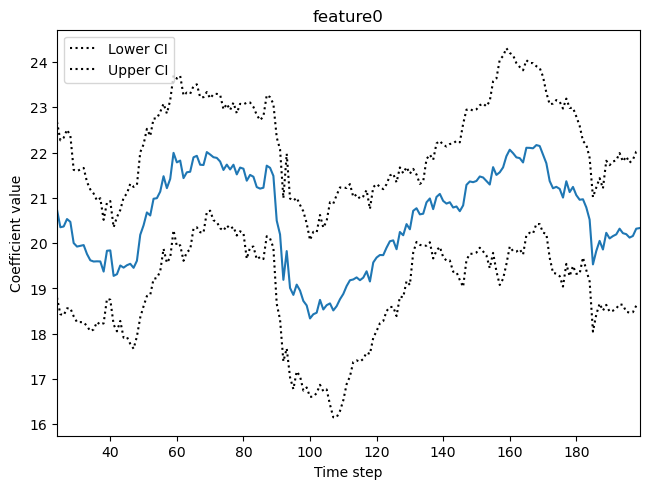

In [18]:
fig = model.plot_recursive_coefficient(variables=['feature0'])
plt.xlabel('Time step')
plt.ylabel('Coefficient value')
plt.show()

In [20]:
reg_rls = sm.RecursiveLS.from_formula(
    'target ~ feature0 + feature1 -1', df)
model_rls = reg_rls.fit()
print(model_rls.summary())

                           Statespace Model Results                           
Dep. Variable:                 target   No. Observations:                  200
Model:                    RecursiveLS   Log Likelihood                -570.923
Date:                Sat, 20 Jul 2024   R-squared:                       0.988
Time:                        16:52:29   AIC                           1145.847
Sample:                             0   BIC                           1152.444
                                - 200   HQIC                          1148.516
Covariance Type:            nonrobust   Scale                           17.413
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feature0      20.6872      0.296     69.927      0.000      20.107      21.267
feature1      34.0655      0.302    112.870      0.000      33.474      34.657
Ljung-Box (L1) (Q):                   2.02   Jarque-

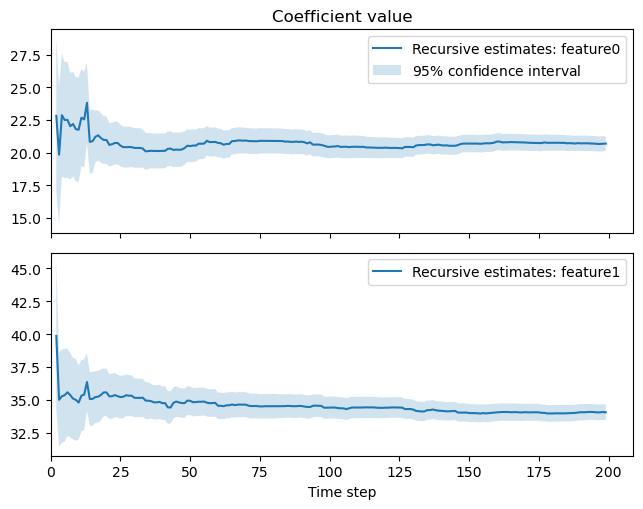

In [22]:
fig = model_rls.plot_recursive_coefficient(range(reg_rls.k_exog), legend_loc='upper right')
ax_list = fig.axes
for ax in ax_list:
    ax.set_xlim(0, None)
ax_list[-1].set_xlabel('Time step')
ax_list[0].set_title('Coefficient value');